In [2]:
import numpy as np
import pandas as pd 
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.layers import BatchNormalization

Paths for folder


In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('D:\\semester 7\\PCD\\UAS\\dataset\\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:\\semester 7\\PCD\\UAS\\dataset\\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train test split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**Data AUgmentation**

In [7]:
# Data Augmentation
data_generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=0.1,
    shear_range=0.2,
    validation_split=0.2
    
)

In [11]:
train_generator = data_generator.flow(X_train, y_train, subset='training')
validation_generator = data_generator.flow(X_train, y_train, subset='validation')

In [28]:
# Menggunakan metode len() untuk melihat jumlah gambar hasil augmentasi
jumlah_augmentasi_train = len(train_generator)
jumlah_augmentasi_val = len(validation_generator)

print("Jumlah gambar hasil augmentasi pada data latih:", jumlah_augmentasi_train)
print("Jumlah gambar hasil augmentasi pada data validasi:", jumlah_augmentasi_val)


Jumlah gambar hasil augmentasi pada data latih: 74
Jumlah gambar hasil augmentasi pada data validasi: 19


**Convolutional Neural Network**

In [8]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

In [13]:
model2=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

In [14]:
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [15]:
history2 = model2.fit(train_generator,epochs=35,validation_data=validation_generator)

Epoch 1/35
74/74 [==============================] - 47s 619ms/step - loss: 4.1054 - accuracy: 0.3987 - val_loss: 1.1522 - val_accuracy: 0.5145
Epoch 2/35
74/74 [==============================] - 59s 791ms/step - loss: 1.1376 - accuracy: 0.4974 - val_loss: 1.0516 - val_accuracy: 0.5196
Epoch 3/35
74/74 [==============================] - 64s 865ms/step - loss: 1.0322 - accuracy: 0.5540 - val_loss: 1.0848 - val_accuracy: 0.5571
Epoch 4/35
74/74 [==============================] - 72s 970ms/step - loss: 1.0133 - accuracy: 0.5774 - val_loss: 0.8556 - val_accuracy: 0.6695
Epoch 5/35
74/74 [==============================] - 69s 932ms/step - loss: 0.8675 - accuracy: 0.6417 - val_loss: 0.7499 - val_accuracy: 0.7223
Epoch 6/35
74/74 [==============================] - 72s 966ms/step - loss: 0.7321 - accuracy: 0.7157 - val_loss: 0.6912 - val_accuracy: 0.7257
Epoch 7/35
74/74 [==============================] - 70s 950ms/step - loss: 0.6603 - accuracy: 0.7315 - val_loss: 0.6548 - val_accuracy: 0.7581

In [16]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
#model.save('modeltumor.h5')
#model.save('modeltumor2.h5')
#model.save('modeltumor3.h5')
#model.save('modeltumor4.h5')
model2.save('modeltumor5.h5')

c:\Users\dhifa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

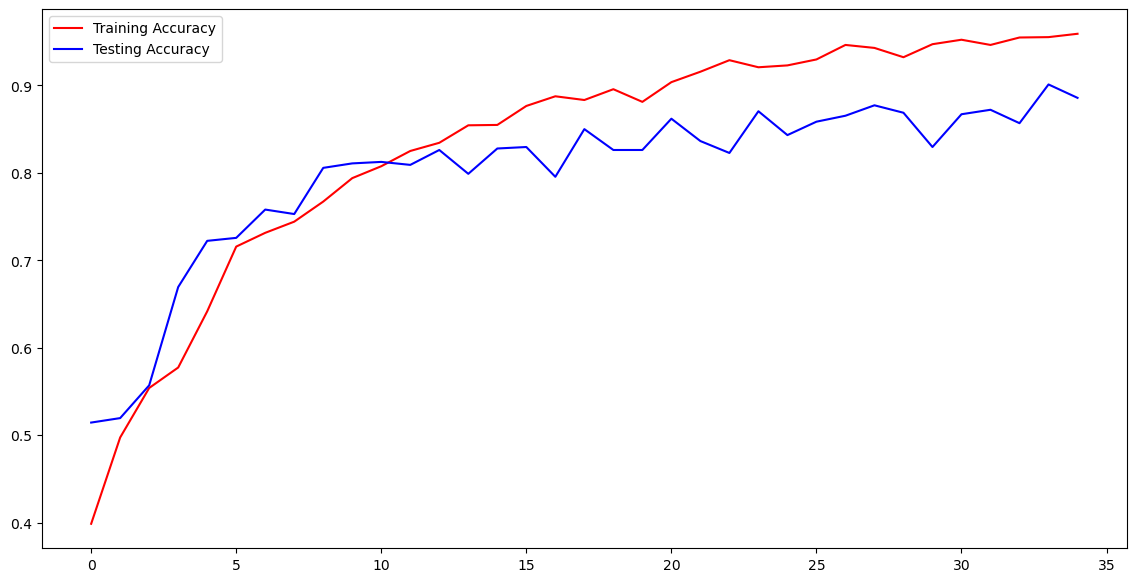

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Testing Accuracy")
plt.legend(loc='upper left')
plt.show()

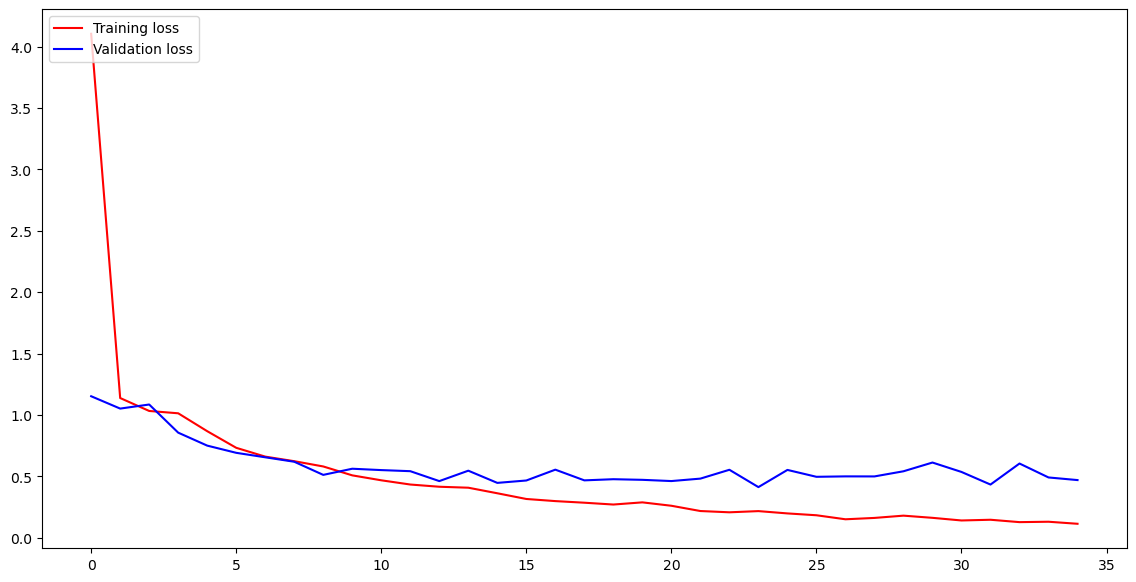

In [19]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np
from tensorflow.keras.models import load_model
loaded_model = load_model('modeltumor5.h5') 

# Mendapatkan label sebenarnya dari data validasi
true_classes = []  # Inisialisasi list untuk menyimpan label sebenarnya

# Mendapatkan label sebenarnya dari data validasi dengan generator
batch_size = validation_generator.batch_size
for i in range(len(validation_generator)):
    _, batch_true_classes = validation_generator[i]
    true_classes.extend(np.argmax(batch_true_classes, axis=1))

true_classes = np.array(true_classes)

# Melakukan prediksi pada data validasi
predictions = model2.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision, Recall, dan Accuracy untuk setiap kelas
precision = precision_score(true_classes, predicted_classes, average=None)
recall = recall_score(true_classes, predicted_classes, average=None)
accuracy = accuracy_score(true_classes, predicted_classes)

# Precision, Recall, dan Accuracy secara keseluruhan (rata-rata dari semua kelas)
overall_precision = precision_score(true_classes, predicted_classes, average='macro')
overall_recall = recall_score(true_classes, predicted_classes, average='macro')
overall_accuracy = accuracy_score(true_classes, predicted_classes)

print("Precision per class:", precision)
print("Recall per class:", recall)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)



19/19 [==============================] - 4s 181ms/step
Confusion Matrix:
Precision per class: [0.85714286 0.88095238 0.84259259 0.93292683]
Recall per class: [0.88732394 0.8        0.89215686 0.96835443]
Overall Precision: 0.8784036649890309
Overall Recall: 0.8869588091967042


**Predicting Brain Tumor**


In [11]:
#img = cv2.imread('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\pituitary_tumor\\p (3).jpg')
#img = cv2.imread('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\no_tumor\\1.jpg')
img = cv2.imread('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\meningioma_tumor\\m (2).jpg')
#img = cv2.imread('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\glioma_tumor\\gg (1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [12]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

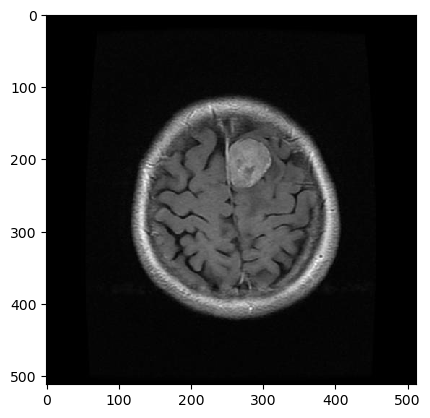

In [13]:
from tensorflow.keras.preprocessing import image
#img = image.load_img('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\pituitary_tumor\\p (3).jpg')
#img = image.load_img('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\no_tumor\\1.jpg')
img = image.load_img('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\meningioma_tumor\\m (2).jpg')
#img = image.load_img('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\glioma_tumor\\gg (1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

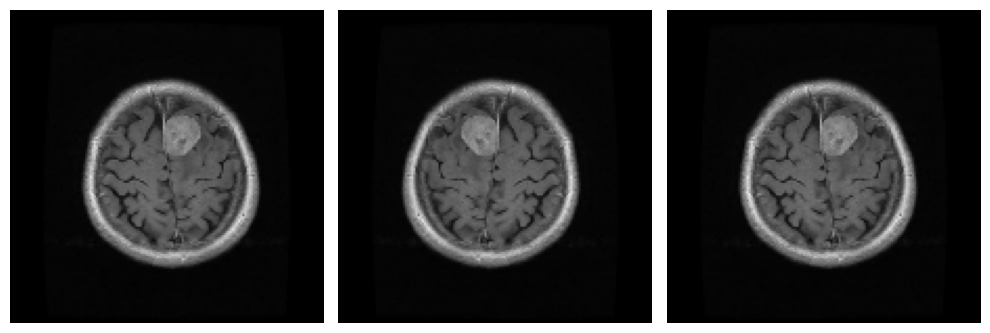

In [27]:
def apply_data_augmentation(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    img_array = img_array.reshape(1, 150, 150, 3)
    data_generator = ImageDataGenerator(
        horizontal_flip=True,
        rotation_range=0.3,
        shear_range=0.2,
        validation_split=0.2
    )
    augmented_images = data_generator.flow(img_array)
    plt.figure(figsize=(10, 10))
    for i in range(3):
        augmented_image = augmented_images.next()[0].astype('uint8')
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
apply_data_augmentation('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\meningioma_tumor\\m (2).jpg')


In [15]:
from tensorflow.keras.models import load_model
loaded_model = load_model('modeltumor5.h5') 
a=loaded_model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 128ms/step
meningioma_tumor


**OTSU**

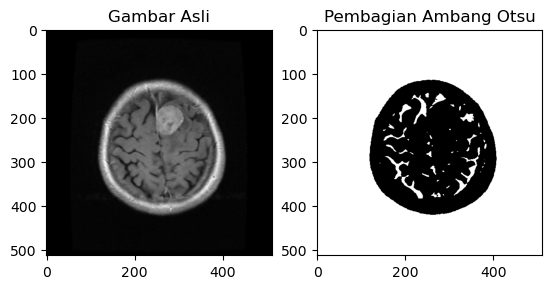

In [18]:
gambar = cv2.imread('D:\\semester 7\\PCD\\UAS\\dataset\\Training\\meningioma_tumor\\m (2).jpg', 0)
blur = cv2.GaussianBlur(gambar, (5, 5), 0)
_, ambang = cv2.threshold(blur, 0,100,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.subplot(121), plt.imshow(blur, 'gray'), plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(ambang, 'gray'), plt.title('Pembagian Ambang Otsu')
plt.show()


**Accuracy Score**

In [20]:
predictions = loaded_model .predict(img_array)
print(predictions)

1/1 [==============================] - 0s 29ms/step
[[4.0685502e-03 9.9551386e-01 4.1676534e-04 8.3884959e-07]]


In [31]:
Y_pred=model2.predict(X_test)
Y_pred

11/11 [==============================] - 1s 108ms/step


array([[1.2032907e-01, 4.0486522e-02, 1.5215587e-04, 8.3903229e-01],
       [3.6628693e-03, 4.4202679e-03, 9.9125564e-01, 6.6126883e-04],
       [9.9584758e-01, 4.1090469e-03, 3.1108721e-05, 1.2224841e-05],
       ...,
       [9.9996805e-01, 1.0951253e-05, 6.9965536e-06, 1.3927811e-05],
       [7.4307162e-01, 2.5670576e-01, 1.8489362e-04, 3.7790720e-05],
       [2.4347466e-08, 5.7766284e-04, 4.5032724e-08, 9.9942219e-01]],
      dtype=float32)

In [21]:
loss, acc = model2.evaluate(x=X_test, y=y_test)

11/11 [==============================] - 1s 109ms/step - loss: 0.3414 - accuracy: 0.9052


In [22]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.3414093852043152
Test Accuracy = 0.9051987528800964
